# Housing Prices Prediction : Advance Regression Technique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb
from scipy import stats
from scipy.stats import norm
%matplotlib inline
mpt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
_id=test['Id']

In [7]:
test.shape

(1459, 80)

In [375]:
train.shape

(1460, 81)

# checking missing values

In [376]:
missing=train.apply(lambda x:(x.isnull().sum()))
missing=missing[missing>0]
missing

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [377]:
missing=missing.to_frame()
missing.columns=['count']
missing.index.names=['name']
missing['name']=missing.index

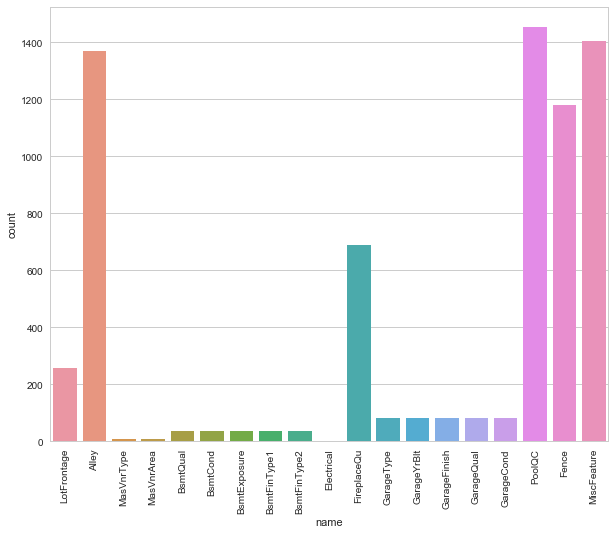

In [378]:
sb.barplot(data=missing,x='name',y='count')
sb.set(style="whitegrid", color_codes=True)
#sb.barplot(x = 'Name', y = 'count', data=miss)
mpt.xticks(rotation = 90)
mpt.show()

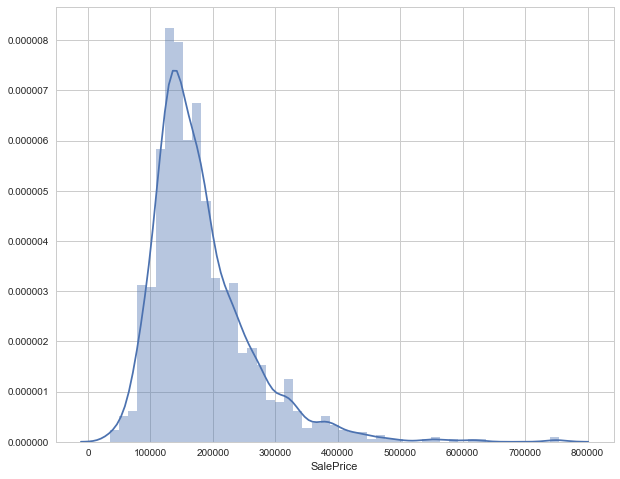

In [379]:
sb.distplot(train['SalePrice'])

In [380]:
#the followng target variavle contain skewness 
skewness=train['SalePrice'].skew()
skewness

1.8828757597682129

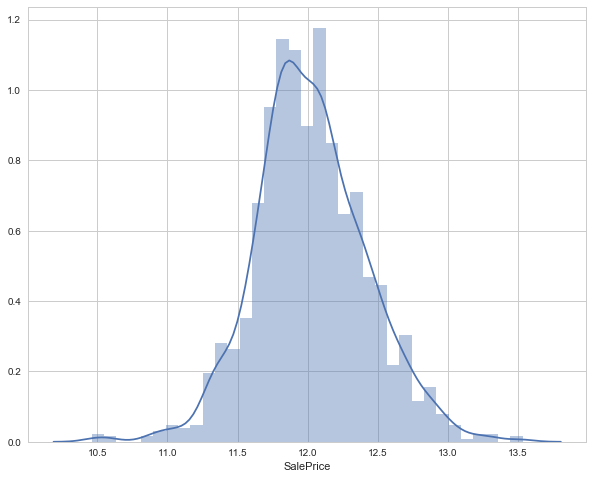

In [381]:
#as it is greater than 0 so it is right skewed
train['SalePrice']=np.log1p(train['SalePrice'])
sb.distplot(train['SalePrice'])

In [382]:
#now seperating the categorical and numerical feature
numerical=train.select_dtypes(include=[np.number])
categorical=train.select_dtypes(exclude=[np.number])

In [383]:
numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220


In [384]:
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


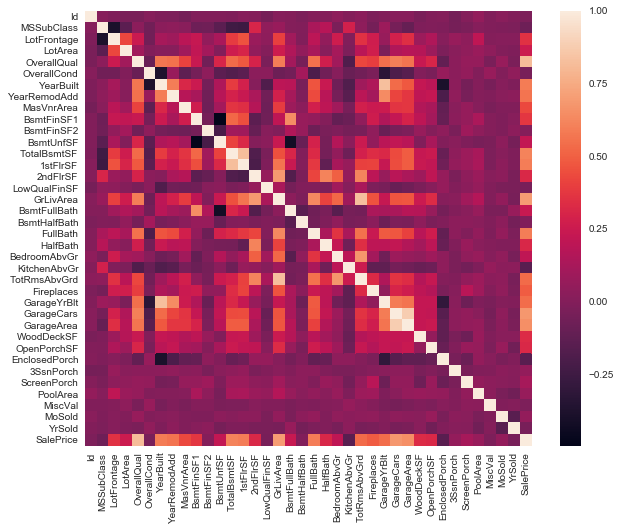

In [385]:
corr=numerical.corr()
sb.heatmap(corr)

In [386]:
correlation=train.corr()['SalePrice'].sort_values(ascending=False)

In [387]:
correlation

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [388]:
numerical['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [389]:
#it is categories to scale the condton of house so we will see the median of SalePrice of different OverQuall 
pivot=pd.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median,data=train)
pivot

,SalePrice
OverallQual,
1,10.798825
2,11.002117
3,11.364912
4,11.589896
5,11.798112
6,11.982935
7,12.206782
8,12.505254
9,12.751303


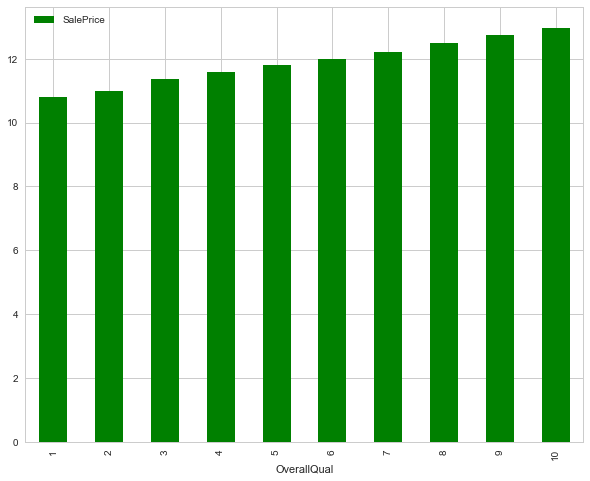

In [390]:
pivot.plot(kind='bar',color='green')

##### sb.jointplot(x=train['GrLivArea'],y=train['SalePrice'])

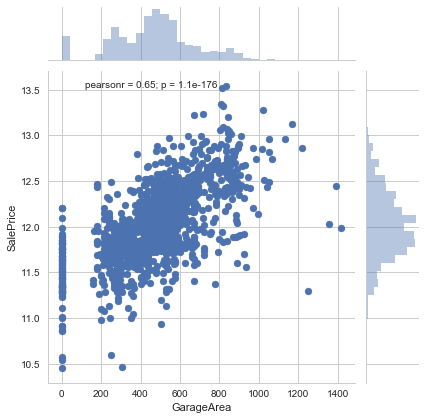

In [392]:
sb.jointplot(x=train['GarageArea'],y=train['SalePrice'])

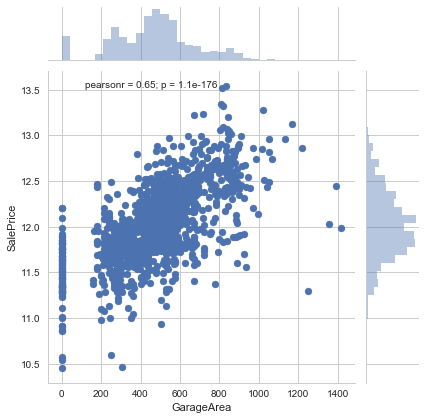

In [393]:
sb.jointplot(x=train['GarageArea'],y=train['SalePrice'])

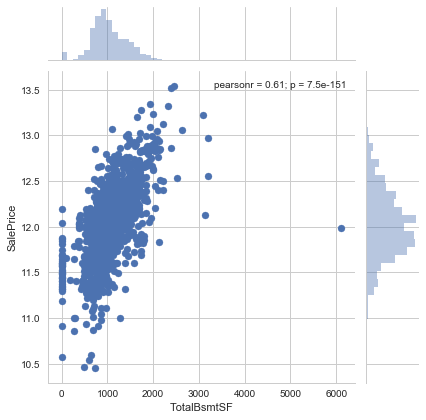

In [394]:
sb.jointplot(x=train['TotalBsmtSF'],y=train['SalePrice'])

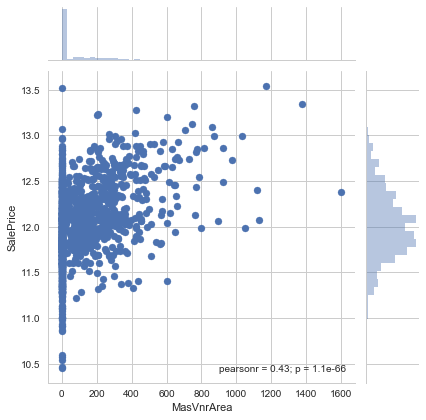

In [395]:
sb.jointplot(x=train['MasVnrArea'],y=train['SalePrice'])

In [396]:
#there are following outliers in the following column for GrLivArea>5000 so we have to remove the following outliers.
#Now we will move forward and explore categorical feature

In [397]:
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [398]:
pivot_Cate=pd.pivot_table(data=train,index='SaleCondition',values='SalePrice',aggfunc=np.median)
pivot_Cate.sort_values(by='SalePrice',axis=0)

,SalePrice
SaleCondition,
AdjLand,11.529266
Abnorml,11.775297
Family,11.852457
Alloca,11.905339
Normal,11.982935
Partial,12.407384


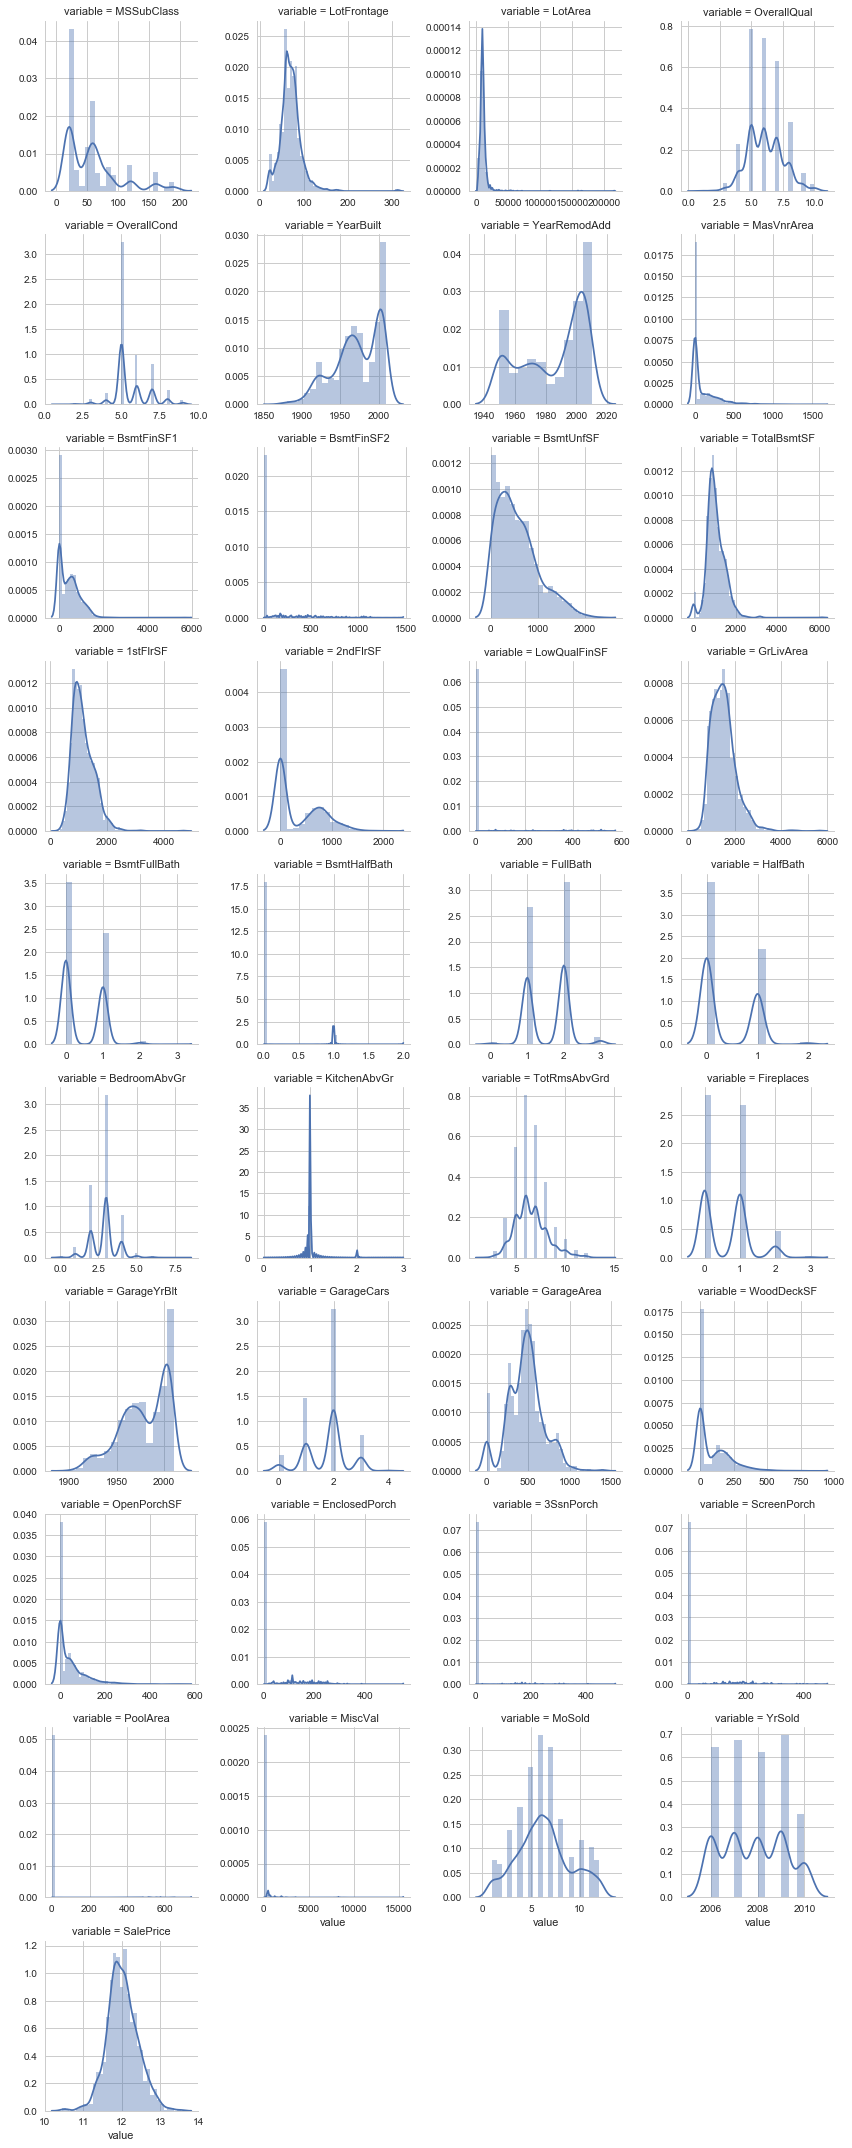

In [399]:

#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sb.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sb.distplot, 'value')
n1

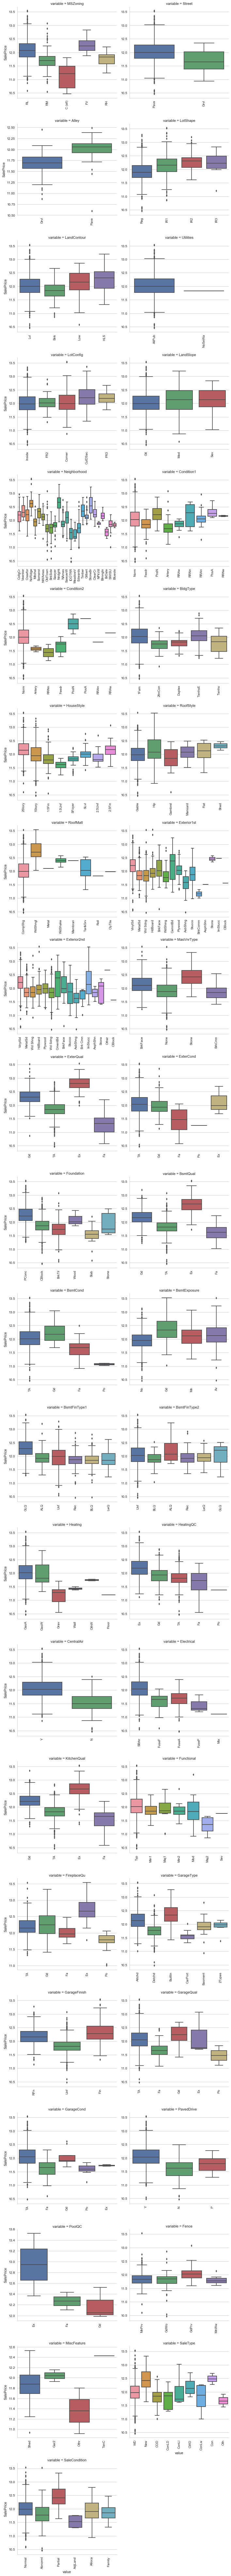

In [400]:
def boxplot(x,y,**kwargs):
            sb.boxplot(x=x,y=y)
            x = mpt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sb.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

# Data Preprocessing

In [401]:
#removing outliers
train.drop( train[(train['GrLivArea'] > 4000)].index, inplace=True)
train.shape #removed 4 rows`
(1456, 81)

(1456, 81)

In [402]:
#comining data 
alldata = train.append(test)
alldata.shape
(2915, 81)

(2915, 81)

In [403]:
miss=alldata.apply(lambda x: (x.isnull().sum()))
miss=miss[miss>0]
miss

Alley           2717
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2345
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2810
PoolQC          2907
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [404]:
#PoolQC contaians most of the missing values
alldata['PoolQC']=alldata['PoolQC'].fillna('None')
alldata['MiscFeature']=alldata['MiscFeature'].fillna('None')
alldata['Alley']=alldata['MiscFeature'].fillna('None')
alldata['Fence']=alldata['Fence'].fillna('None')
alldata['FireplaceQu']=alldata['FireplaceQu'].fillna('None')
alldata['LotFrontage']=alldata.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))


In [405]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    alldata[col]=alldata[col].fillna('None')

In [406]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    alldata[col]=alldata[col].fillna(0)

In [407]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    alldata[col]=alldata[col].fillna(0)

In [408]:
alldata['MasVnrType']=alldata['MasVnrType'].fillna('None')
alldata['MasVnrArea']=alldata['MasVnrArea'].fillna(0)

In [409]:
alldata['MSZoning']=alldata['MSZoning'].fillna(alldata['MSZoning'].mode()[0])

In [410]:
del alldata['Utilities']

In [411]:
alldata['Functional']=alldata['Functional'].fillna('Typ')
alldata['Electrical']=alldata['Electrical'].fillna(alldata['Electrical'].mode()[0])
alldata['KitchenQual']=alldata['KitchenQual'].fillna(alldata['KitchenQual'].mode()[0])
alldata['Exterior1st']=alldata['Exterior1st'].fillna(alldata['Exterior1st'].mode()[0])
alldata['Exterior2nd']=alldata['Exterior2nd'].fillna(alldata['Exterior2nd'].mode()[0])
alldata['SaleType']=alldata['SaleType'].fillna(alldata['SaleType'].mode()[0])
alldata['MSSubClass']=alldata['MSSubClass'].fillna('None')

In [412]:
alldata['BsmtQual']=alldata['BsmtQual'].fillna(alldata['BsmtQual'].mode()[0])
alldata['BsmtCond']=alldata['BsmtCond'].fillna(alldata['BsmtCond'].mode()[0])
alldata['BsmtExposure']=alldata['BsmtExposure'].fillna(alldata['BsmtExposure'].mode()[0])
alldata['BsmtFinType1']=alldata['BsmtFinType1'].fillna(alldata['BsmtFinType1'].mode()[0])
alldata['BsmtFinType2']=alldata['BsmtFinType2'].fillna(alldata['BsmtFinType2'].mode()[0])

In [413]:
alldata['MSSubClass']=alldata['MSSubClass'].apply(str)

In [414]:
alldata['OverallCond']=alldata['OverallCond'].astype(str)

In [415]:
alldata['OverallQual']=alldata['OverallQual'].astype(str)
alldata['YrSold']=alldata['YrSold'].astype(str)
alldata['MoSold']=alldata['MoSold'].astype(str)

In [416]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
col={'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','OverallQual'}

for c in col:
    alldata[c]=lc.fit_transform(alldata[c].values)


In [417]:
alldata.shape

(2915, 80)

In [418]:
del alldata['Id']

In [419]:
numeric=alldata.select_dtypes(include=[np.number])

In [420]:
skew_feat=numeric.apply(lambda x:x.skew()).sort_values()
skew_feat

PoolQC          -22.996032
Street          -15.497353
Functional       -4.054581
GarageYrBlt      -3.905056
GarageCond       -3.594639
CentralAir       -3.457866
BsmtFinType2     -3.456833
BsmtCond         -3.381351
GarageQual       -3.073005
PavedDrive       -2.977930
ExterCond        -2.496544
Fence            -1.995219
ExterQual        -1.801099
KitchenQual      -1.452317
BsmtQual         -1.302377
BsmtExposure     -1.222648
MoSold           -0.646115
LotShape         -0.620921
GarageFinish     -0.612193
YearBuilt        -0.598395
YearRemodAdd     -0.449345
OverallQual      -0.291826
GarageCars       -0.219515
BsmtFinType1     -0.091994
SalePrice         0.065460
YrSold            0.130977
MSSubClass        0.141096
FullBath          0.160000
GarageArea        0.217860
BedroomAbvGr      0.328298
FireplaceQu       0.338376
HeatingQC         0.484661
OverallCond       0.569436
BsmtFullBath      0.623140
TotalBsmtSF       0.662998
HalfBath          0.699130
Fireplaces        0.726331
T

# Feature Engineering

In [421]:
skew_feat[abs(skew_feat)>0.75]
skew_feat.shape
skew=skew_feat.index
skew

Index(['PoolQC', 'Street', 'Functional', 'GarageYrBlt', 'GarageCond',
       'CentralAir', 'BsmtFinType2', 'BsmtCond', 'GarageQual', 'PavedDrive',
       'ExterCond', 'Fence', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'BsmtExposure', 'MoSold', 'LotShape', 'GarageFinish', 'YearBuilt',
       'YearRemodAdd', 'OverallQual', 'GarageCars', 'BsmtFinType1',
       'SalePrice', 'YrSold', 'MSSubClass', 'FullBath', 'GarageArea',
       'BedroomAbvGr', 'FireplaceQu', 'HeatingQC', 'OverallCond',
       'BsmtFullBath', 'TotalBsmtSF', 'HalfBath', 'Fireplaces', 'TotRmsAbvGrd',
       '2ndFlrSF', 'BsmtUnfSF', 'BsmtFinSF1', 'GrLivArea', 'LotFrontage',
       '1stFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'MasVnrArea', 'BsmtHalfBath',
       'ScreenPorch', 'EnclosedPorch', 'BsmtFinSF2', 'KitchenAbvGr',
       'LandSlope', 'Alley', '3SsnPorch', 'LowQualFinSF', 'LotArea',
       'PoolArea', 'MiscVal'],
      dtype='object')

In [422]:
#here we apply box cox transformation 
#A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. 
#Normality is an important assumption for many statistical techniques; if your data isn’t normal,
#applying a Box-Cox means that you are able to run a broader number of tests.
#We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .
#At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. 
#All values of λ are considered and the optimal value for your data is selected; The “optimal value” 
#is the one which results in the best approximation of a normal distribution curve.
#Note that setting  λ=0  is equivalent to log1p used above for the target variable.
 
from scipy.special import boxcox1p
skewness=skew_feat.index
lam=0.15
for i in skewness:
    alldata[i]=boxcox1p(alldata[i],lam)


In [423]:
#get dummy variables
alldata=pd.get_dummies(alldata)
alldata.shape

(2915, 220)

In [424]:
y=alldata['SalePrice']

In [425]:
alldata.drop('SalePrice',axis=1,inplace=True)

In [426]:
alldata.shape

(2915, 219)

In [427]:
len_train=train.shape[0]

In [428]:
train=alldata[:len_train]
test=alldata[len_train:]

In [429]:
train.shape

(1456, 219)

In [430]:
test.shape

(1459, 219)

In [431]:
y=y[y>0]

# modeling

In [432]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [433]:
from sklearn.linear_model import Ridge, RidgeCV , LassoCV, LassoLarsCV, ElasticNet
from sklearn.model_selection import cross_val_score,KFold

nfold=5
def rmse_cv(model):
    kf=KFold(nfold,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse=np.sqrt(-cross_val_score(model,train,y,scoring='neg_mean_squared_error',cv=kf))
    return(rmse)             

In [434]:
#lasso model
lasso=make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))

In [435]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [436]:
#Elastic net regression
elastic=make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,random_state=1,l1_ratio=0.9))

In [437]:
from sklearn.ensemble import GradientBoostingRegressor

In [438]:
#gradientBoosting
gboost=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [439]:
import xgboost as xgb

In [440]:
model_xgb=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)                           

In [441]:
score=rmse_cv(lasso)
print('score is {:.4f}({:.4f})\n'.format(score.mean(),score.std()))

score is 0.0148(0.0009)



In [442]:
score=rmse_cv(elastic)
print('score is {:.4f}({:.4f})\n'.format(score.mean(),score.std()))

score is 0.0147(0.0008)



In [443]:
score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0143 (0.0009)



In [444]:
score=rmse_cv(model_xgb)
print('score is {:.4f}({:.4f})\n'.format(score.mean(),score.std()))

score is 0.0237(0.0013)



In [445]:
score=rmse_cv(gboost)
print('score is {:.4f}({:.4f})\n'.format(score.mean(),score.std()))

score is 0.0132(0.0009)



In [454]:
# here we are using gradient boosting and xgboost models,we will not use Lasso and Elastic models as they are giving very less
#rmse error which tells they are overfitting with training data.

In [455]:
elastic.fit(train,y)


Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False))])

In [456]:
model_xgb.fit(train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [457]:
xgboost_predict=np.expm1(model_xgb.predict(test))

In [458]:
elastic_predict=np.expm1(elastic.predict(test))

In [459]:
predictions=pd.DataFrame({'Elastic':elastic_predict,'xgboost':xgboost_predict})

In [466]:
#Many times it makes sense to take a weighted average of uncorrelated results - this usually imporoves the score
pred=(0.7*xgboost_predict+0.3*elastic_predict)*10000